# <center>HW1</center> #
####
***

## <u>Question 1</u>

### Implementation
* 在不使用現有套件進行矩陣運算(如numpy)的情況下，利用Python運算出平均、標準差，並將整組數據進行標準化
* 首先使用pandas中的read_csv把data讀進來，並對data進行分析處理
* 利用pandas中indexing的方式，可以將四種特徵以及label抓出來，接著把這三種花的四項feature用迴圈再抓出來，個別存入list中
* 設計find_mean、find_std的函式，利用數學定義，來幫忙算出平均、標準差，並另外存入三種花的list中，最後再將結果轉回pandas的表格輸出出來
* 標準化數據的部分便是設計standardlize的函式，利用定義data進行操作，同樣地存入個別的三個list中
* 為了方便閱讀，最後便按照pandas DataFrame的格式，將標準化後的數據重新建出表格輸出
* Mean formula:
$$\bar{x} = \frac{\sum_{i=1}^N(x_i)}{n}$$

* Standard devation formula:
$$\sigma=\sqrt{\frac{1}{N}\sum_{i=1}^N(x_i-\bar{x})^2}$$

* Standardlize formula:
$$x_i'=\frac{x_i -\bar{x}}{\sigma} $$


### Result & Codes

In [6]:
import os
import math
import numpy as np
import pandas as pd
from IPython.display import HTML

curr_dir = os.getcwd() + '\iris.data'
df  = pd.read_csv(curr_dir, header = None)

# take the label cols
# Iris-setosa: 0
# Iris-versicolor: 1
# Iris-virginica: 2
# labels = df.iloc[:, 4].values
# sepal_length, sepal_width= df.iloc[:, 0].values, df.iloc[:, 1].values
# petal_length, petal_width = df.iloc[:, 2].values, df.iloc[:, 3].values
labels = df[4].values
sepal_length, sepal_width= df[0].values, df[1].values
petal_length, petal_width = df[2].values, df[3].values

setosa_sl, setosa_sw, setosa_pl, setosa_pw = [], [], [], []
versicolor_sl, versicolor_sw, versicolor_pl, versicolor_pw = [], [], [], []
virginica_sl, virginica_sw, virginica_pl, virginica_pw = [], [], [], []

size = len(sepal_length)

for i in range(size):
    if labels[i] == 0:
        setosa_sl.append(sepal_length[i])
        setosa_sw.append(sepal_width[i])
        setosa_pl.append(petal_length[i])
        setosa_pw.append(petal_width[i])
    elif labels[i] == 1:
        versicolor_sl.append(sepal_length[i])
        versicolor_sw.append(sepal_width[i])
        versicolor_pl.append(petal_length[i])
        versicolor_pw.append(petal_width[i])
    elif labels[i] == 2:
        virginica_sl.append(sepal_length[i])
        virginica_sw.append(sepal_width[i])
        virginica_pl.append(petal_length[i])
        virginica_pw.append(petal_width[i])
print("Data has been processed successfully!")

Data has been processed successfully!


In [7]:
# (1)
# find Means
def find_mean(data):
    cnt = 0
    for obj in data:
        cnt += obj
    return cnt / len(data)

setosa_mean = [find_mean(setosa_sl), find_mean(setosa_sw), find_mean(setosa_pl), find_mean(setosa_pw)]
versicolor_mean = [find_mean(versicolor_sl), find_mean(versicolor_sw), find_mean(versicolor_pl), find_mean(versicolor_pw)]
virginica_mean = [find_mean(virginica_sl), find_mean(virginica_sw), find_mean(virginica_pl), find_mean(virginica_pw)]

# Construct the output table for mean
mean_output = pd.DataFrame([setosa_mean, versicolor_mean, virginica_mean], index = ['setosa', 'versicolor', 'virginica'], 
                                 columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

print('Means of the features:')
HTML(mean_output.to_html())
mean_output.style.set_properties(**{'background-color': 'black','color': 'lawngreen', 'border-color': 'white'})

Means of the features:


,sepal length,sepal width,petal length,petal width
setosa,5.006000,3.418000,1.464000,0.244000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.588000,2.974000,5.552000,2.026000


In [8]:
# (2)
# find Standard deviations
def find_std(data, mean):
    cnt = 0
    for obj in data:
        cnt += (obj - mean) ** 2
    return math.sqrt(cnt / len(data))

#  index 0, 1, 2, 3 represent (sepal length, sepal width, petal length, petal width)
setosa_std = [find_std(setosa_sl, setosa_mean[0]), find_std(setosa_sw, setosa_mean[1]), 
                            find_std(setosa_pl, setosa_mean[2]), find_std(setosa_pw, setosa_mean[3])]
versicolor_std =  [find_std(versicolor_sl, versicolor_mean[0]), find_std(versicolor_sw, versicolor_mean[1]), 
                                    find_std(versicolor_pl, versicolor_mean[2]), find_std(versicolor_pw, versicolor_mean[3])]
virginica_std =  [find_std(virginica_sl, virginica_mean[0]), find_std(virginica_sw, virginica_mean[1]), 
                                  find_std(virginica_pl, virginica_mean[2]), find_std(virginica_pw, virginica_mean[3])]

# Construct the output table for mean standard deviation
std_output = pd.DataFrame([setosa_std, versicolor_std, virginica_std], index = ['setosa', 'versicolor', 'virginica'], 
                                 columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
print('Standard deviations of the features: ')
HTML(std_output.to_html())
std_output.style.set_properties(**{'background-color': 'black','color': 'lawngreen', 'border-color': 'white'})

Standard deviations of the features: 


,sepal length,sepal width,petal length,petal width
setosa,0.348947,0.377195,0.171767,0.106132
versicolor,0.510983,0.310644,0.465188,0.195765
virginica,0.629489,0.319255,0.546348,0.271890


In [9]:
# (3)
# standardlize the data
def standardlize(data, mean, std):
    ans = []
    for obj in data:
        ans.append((obj - mean) / std)
    return ans

#  index 0, 1, 2, 3 represent (sepal length, sepal width, petal length, petal width)
setosa_std_val = [standardlize(setosa_sl, setosa_mean[0], setosa_std[0]), standardlize(setosa_sw, setosa_mean[1], setosa_std[1]),
                                     standardlize(setosa_pl, setosa_mean[2], setosa_std[2]), standardlize(setosa_pw, setosa_mean[3], setosa_std[3])]
versicolor_std_val = [standardlize(versicolor_sl, versicolor_mean[0], versicolor_std[0]), 
                                            standardlize(versicolor_sw, versicolor_mean[1], versicolor_std[1]),
                                            standardlize(versicolor_pl, versicolor_mean[2], versicolor_std[2]), 
                                            standardlize(versicolor_pw, versicolor_mean[3], versicolor_std[3])]
virginica_std_val = [standardlize(virginica_sl, virginica_mean[0], virginica_std[0]), 
                                            standardlize(virginica_sw, virginica_mean[1], virginica_std[1]),
                                            standardlize(virginica_pl, virginica_mean[2], virginica_std[2]), 
                                            standardlize(virginica_pw, virginica_mean[3], virginica_std[3])]
#  Recostruct the table
data_table = {'sepal length': setosa_std_val[0] + versicolor_std_val[0] + virginica_std_val[0],
                             'sepal width': setosa_std_val[1] + versicolor_std_val[1] + virginica_std_val[1],
                             'petal length': setosa_std_val[2] + versicolor_std_val[2] + virginica_std_val[2],
                             'petal width': setosa_std_val[3] + versicolor_std_val[3] + virginica_std_val[3], 
                             'label': df.iloc[:, 4].values}

std_feature = pd.DataFrame(data = data_table)
print('Standardlized data: ')
HTML(std_feature.to_html())
std_feature.style.set_properties(**{'background-color': 'black','color': 'lawngreen', 'border-color': 'white'})


Standardlized data: 


,sepal length,sepal width,petal length,petal width,label
0,0.269382,0.217394,-0.372597,-0.414578,0
1,-0.303771,-1.108180,-0.372597,-0.414578,0
2,-0.876924,-0.577951,-0.954780,-0.414578,0
3,-1.163501,-0.843065,0.209586,-0.414578,0
4,-0.017195,0.482509,-0.372597,-0.414578,0
5,1.129111,1.277854,1.373952,1.469868,0
6,-1.163501,-0.047721,-0.372597,0.527645,0
7,-0.017195,-0.047721,0.209586,-0.414578,0
8,-1.736653,-1.373295,-0.372597,-0.414578,0
9,-0.303771,-0.843065,0.209586,-1.356801,0


### Discussion

第一部分的作業目的讓我們熟悉Python的基本操作<br>
並在不使用套件進行矩陣運算的情況下，自己把平均、標準差、標準化數據的處理實作出來<br>
因為此處操作資料多使用傳統的迴圈運算，搭配數學定義把結果計算出來，雖然使用上沒有套件來的迅速，但可以更扎實的練習到Python基礎<br>
<br>
藉由這次作業我對pandas的操作更加熟悉，像是如何建立DataFrame或是利用indexing來取出我想要的columns，我覺得都是常用的數據分析技巧<br>
此處我在練習時也注意到重建pandas的DataFrame可以使用dict去建，但須小心重建的時候data是對應到columns而非rows<br>
還有輸出DataFrame的時候，查了一下資料發現可以使用style class裡的 **set_properties** 去修改表格的格式，如此一來能讓表格的樣貌有特殊風格<br>
除此之外，由於是使用ipynb來繳交作業，因此也學到怎麼撰寫Markdown排版，讓整體的呈現更加好看，讀的人能更直觀地觀察到輸出結果<br>

## <u>Question 2</u>

### Implementation
* 使用matplotlib畫出散佈圖(Scatter plot)
* 利用 **plt.scatter** 方法進行繪圖，並利用color, marker, label等參數來指定資料的顏色、圖案、標籤
* 接著使用 **plt.xlabel, plt.ylabel** 把座標的名稱指定好，以及 **plt.legend** 來顯示圖例的部分
* 最後使用plt.show()來顯示結果，重複以上做法三次即可按照題意畫出散佈圖，並藉由觀察散佈圖了解data的相關性

### Result & Codes

(a) (sepal width, petal width) of setosa and veriscolor: 


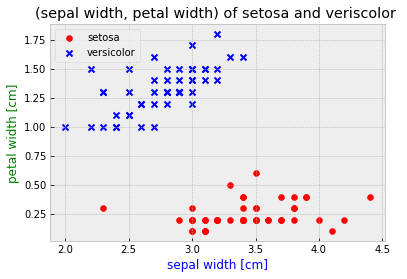

(b) (sepal length, petal width) of veriscolor and virginica: 


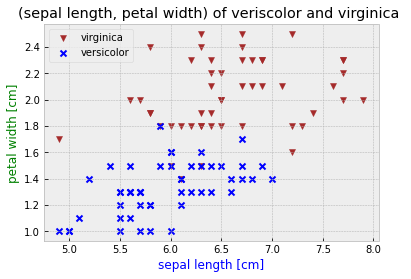

(c) (sepal length, petal length) of veriscolor and setosa: 


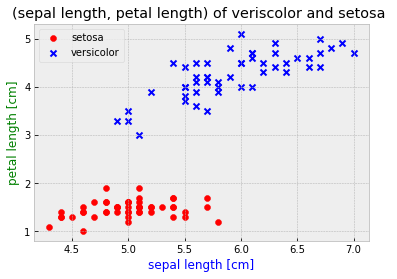

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('bmh') # set the plot style

print('(a) (sepal width, petal width) of setosa and veriscolor: ')
# (a)
plt.scatter(setosa_sw, setosa_pw, color = 'r', marker = 'o', label = 'setosa')
plt.scatter(versicolor_sw, versicolor_pw, color = 'b', marker = 'x', label = 'versicolor')
plt.xlabel('sepal width [cm]').set_color('b')
plt.ylabel('petal width [cm]').set_color('g')
plt.legend(loc = 'upper left')
plt.title('(sepal width, petal width) of setosa and veriscolor ')
plt.show()

print('(b) (sepal length, petal width) of veriscolor and virginica: ')
# (b)
plt.scatter(virginica_sl, virginica_pw, color = 'brown', marker = 'v', label = 'virginica')
plt.scatter(versicolor_sl, versicolor_pw, color = 'b', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]').set_color('b')
plt.ylabel('petal width [cm]').set_color('g')
plt.legend(loc = 'upper left')
plt.title('(sepal length, petal width) of veriscolor and virginica ')
plt.show()

print('(c) (sepal length, petal length) of veriscolor and setosa: ')
# (c)
plt.scatter(setosa_sl, setosa_pl, color = 'r', marker = 'o', label = 'setosa')
plt.scatter(versicolor_sl, versicolor_pl, color = 'b', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]').set_color('b')
plt.ylabel('petal length [cm]').set_color('g')
plt.legend(loc = 'upper left')
plt.title('(sepal length, petal length) of veriscolor and setosa ')
plt.show()


### Discussion


第二題是要我們練習畫圖的套件，這裡選用的是經典的matplotlib<br>
之前修其他課程時有稍微使用過matplotlib的繪圖，是畫出直方圖、圓餅圖等功能，這題則要我們畫出兩種資料的散佈圖(scatter plot)<br>
為了讓結果更美觀，使用scatter plot的時候可以更改參數，像是color決定顏色、marker決定圖案的樣貌<br>
於是，這題我使用不同的顏色以及圖案來讓各種data表示得更清楚(棕色、藍色、紅色以及三角形、叉叉、圓形)<br>
另外，也利用 **plt.style.use** 去更改整個plot的樣貌，此處選擇內建的bmh style，因為具有格線的特性，可以讓圖更易讀<br>
我認為讓圖形的呈現更加美觀，可以讓看的人較容易看出資料是屬於哪一類別，並且迅速地了解某項資料的分布趨勢，是作圖時需要考慮的點<br>
